In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn.objects as so
import math
from statsmodels.stats import diagnostic
import statsmodels.stats as st
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.recursive_ls as rls
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pickle

import plotly.express as px

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import plotly.io as pio
#import template_plotly.py
%load_ext autoreload
%autoreload 2

pd.options.plotting.backend = "plotly"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df_movie = pd.read_pickle('../data/df_movie.pkl')
df_pairs = pd.read_pickle('../data/df_pairs.pkl')
display(df_movie.sample(2))
display(df_pairs.sample(2))

,Movie_name,Movie_release,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Main_genre,Sec_Genre,Movie_rating,Producer,...,Actor_name,Actor_age_release,Inflation Factor for 2023,2023 valued revenue,Avg_revenue_per_film_at_release,Longevity,Number_of_film_at_release,Avg_rating_per_film_at_release,First_film,Actor_main_genre
325164,Pearl Harbor,2001.0,449220945.0,184.0,"{""/m/064_8sq"": ""French Language"", ""/m/03_9r"": ...","{""/m/09c7w0"": ""United States of America""}",Action/Adventure,Period piece,6.2,Jerry Bruckheimer,...,Kim Coates,42.0,1.74,781644444.3,1.381095e+08,10.0,9,6.100000,False,Thriller
180760,Meet Me in Las Vegas,1956.0,2400000.0,112.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}",Musical,Romance Film,6.1,NaN,...,Cyd Charisse,33.0,11.31,27144000.0,4.186889e+06,10.0,9,6.628571,False,Musical


,Movie_name,Movie_release,Actor_pairs,Movie_revenue,Movie_rating,Actor1,Actor2,Age_difference,Film_count_difference,Average_revenue_difference,First_film,First_film_for_one,Number_of_films_together,Same_genre,Genre
350278,Silver City,2004.0,"(James Gammon, Roslyn Washington)",1384395.0,6.0,James Gammon,Roslyn Washington,NaN,20,2.709105e+07,False,True,0,False,None
319816,Rescue Dawn,2006.0,"(Brad Carr, Somkuan 'Kuan' Siroon)",7177143.0,7.3,Brad Carr,Somkuan 'Kuan' Siroon,NaN,0,0.000000e+00,True,True,0,True,Adventure


### RQ1: How does the frequency of actor co-starring impact the chemistry and success of collaborative films?

In [4]:
df_pairs.sort_values(by=['Movie_rating', 'Movie_revenue'], ascending=[False, False], inplace=True)

# Rank the movies based on the sorted order
df_pairs['Rank'] = range(1, len(df_pairs) + 1)

# Calculate the ranking ratio
df_pairs['RankingRatio'] = 1 - ((df_pairs['Rank'] - 1) / (len(df_pairs) - 1))

In [5]:
df_pairs.sort_values('RankingRatio')

,Movie_name,Movie_release,Actor_pairs,Movie_revenue,Movie_rating,Actor1,Actor2,Age_difference,Film_count_difference,Average_revenue_difference,First_film,First_film_for_one,Number_of_films_together,Same_genre,Genre,Rank,RankingRatio
468018,The Oogieloves in the Big Balloon Adventure,2012.0,"(Cloris Leachman, Jaime Pressly)",1066000.0,1.7,Cloris Leachman,Jaime Pressly,51.0,22,1.525863e+07,False,False,0,True,Romantic comedy,552170,0.000000
468017,The Oogieloves in the Big Balloon Adventure,2012.0,"(Christopher Lloyd, Jaime Pressly)",1066000.0,1.7,Christopher Lloyd,Jaime Pressly,38.0,29,1.380931e+07,False,False,0,False,None,552169,0.000002
468016,The Oogieloves in the Big Balloon Adventure,2012.0,"(Christopher Lloyd, Cloris Leachman)",1066000.0,1.7,Christopher Lloyd,Cloris Leachman,13.0,7,2.906794e+07,False,False,0,False,None,552168,0.000004
156594,From Justin to Kelly,2003.0,"(Katherine Bailess, Kelly Clarkson)",4928883.0,1.9,Katherine Bailess,Kelly Clarkson,2.0,0,0.000000e+00,True,True,0,True,Romantic comedy,552167,0.000005
156593,From Justin to Kelly,2003.0,"(Justin Guarini, Kelly Clarkson)",4928883.0,1.9,Justin Guarini,Kelly Clarkson,3.0,0,0.000000e+00,True,True,0,True,Romantic comedy,552166,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191179,Hit and Run,2012.0,"(Beau Bridges, John Duff)",14453354.0,9.4,Beau Bridges,John Duff,NaN,21,2.417822e+07,False,True,0,False,None,5,0.999993
191178,Hit and Run,2012.0,"(Beau Bridges, Jess Rowland)",14453354.0,9.4,Beau Bridges,Jess Rowland,NaN,21,2.417822e+07,False,True,0,False,None,4,0.999995
191177,Hit and Run,2012.0,"(Beau Bridges, Dax Shepard)",14453354.0,9.4,Beau Bridges,Dax Shepard,34.0,12,2.286212e+07,False,False,0,False,None,3,0.999996
191176,Hit and Run,2012.0,"(Beau Bridges, David Koechner)",14453354.0,9.4,Beau Bridges,David Koechner,21.0,8,2.119870e+07,False,False,0,False,None,2,0.999998


In [6]:
df_pairs.sort_values(['Number_of_films_together', 'RankingRatio'], ascending= [False, False]).head()

,Movie_name,Movie_release,Actor_pairs,Movie_revenue,Movie_rating,Actor1,Actor2,Age_difference,Film_count_difference,Average_revenue_difference,First_film,First_film_for_one,Number_of_films_together,Same_genre,Genre,Rank,RankingRatio
396885,Terror in the Aisles,1984.0,"(Dean Martin, Jerry Lewis)",10004817.0,6.3,Dean Martin,Jerry Lewis,9.0,4,1.515564e+07,False,False,15,True,Comedy,336575,0.390451
294270,Pardners,1956.0,"(Dean Martin, Jerry Lewis)",3600000.0,6.1,Dean Martin,Jerry Lewis,9.0,0,0.000000e+00,False,False,13,True,Comedy,383695,0.305115
34036,Artists and Models,1955.0,"(Dean Martin, Jerry Lewis)",3800000.0,6.5,Dean Martin,Jerry Lewis,9.0,0,0.000000e+00,False,False,11,True,Comedy,291571,0.471955
549956,You're Never Too Young,1955.0,"(Dean Martin, Jerry Lewis)",3400000.0,6.5,Dean Martin,Jerry Lewis,9.0,0,0.000000e+00,False,False,11,True,Comedy,291805,0.471531
171113,Grown Ups,2010.0,"(Adam Sandler, Rob Schneider)",271430189.0,6.0,Adam Sandler,Rob Schneider,3.0,3,7.400058e+06,False,False,11,False,None,388990,0.295525


In [12]:
grouped_data_mean = df_pairs.groupby(by='Actor_pairs').agg({'RankingRatio': 'mean', 'Number_of_films_together' : 'max'})
grouped_data_mean.sort_values('Number_of_films_together', ascending=False)
#grouped_data['Number_of_films_together'].max()

,RankingRatio,Number_of_films_together
Actor_pairs,,
"(Dean Martin, Jerry Lewis)",0.369949,15
"(Adam Sandler, Rob Schneider)",0.275045,11
"(Adam Sandler, Allen Covert)",0.378729,10
"(Fred Astaire, Ginger Rogers)",0.740809,9
"(Ben Stiller, Owen Wilson)",0.443323,8
...,...,...
"(Corey Johnson, Selma Blair)",0.637155,0
"(Corey Johnson, Scott Glenn)",0.964993,0
"(Corey Johnson, Rupert Evans)",0.637156,0


In [18]:
grouped_data_max = df_pairs.groupby(by='Actor_pairs').agg({'RankingRatio': 'max', 'Number_of_films_together' : 'max'})
df_sorted = df_pairs.copy()

In [19]:
df_sorted = df_pairs.sort_values(['Actor_pairs', 'Number_of_films_together'], ascending=[True, False])

In [25]:
last_films_df = df_sorted.groupby('Actor_pairs').head(1)
first_films_df = df_sorted.groupby('Actor_pairs').tail(1)

In [33]:
comparison_df = pd.merge(first_films_df, last_films_df, on='Actor_pairs', suffixes=('_first', '_last'))
comparison_df

,Movie_name_first,Movie_release_first,Actor_pairs,Movie_revenue_first,Movie_rating_first,Actor1_first,Actor2_first,Age_difference_first,Film_count_difference_first,Average_revenue_difference_first,...,Age_difference_last,Film_count_difference_last,Average_revenue_difference_last,First_film_last,First_film_for_one_last,Number_of_films_together_last,Same_genre_last,Genre_last,Rank_last,RankingRatio_last
0,Get Rich or Die Tryin',2005.0,"(50 Cent, Adewale Akinnuoye-Agbaje)",46442528.0,5.4,50 Cent,Adewale Akinnuoye-Agbaje,8.0,4,1.651370e+08,...,8.0,4,1.651370e+08,False,True,0,False,None,478979,0.132552
1,Righteous Kill,2008.0,"(50 Cent, Al Pacino)",76747202.0,6.0,50 Cent,Al Pacino,35.0,25,4.214726e+07,...,35.0,25,4.214726e+07,False,False,0,False,None,394047,0.286367
2,Righteous Kill,2008.0,"(50 Cent, Alan Blumenfeld)",76747202.0,6.0,50 Cent,Alan Blumenfeld,23.0,5,1.551516e+07,...,23.0,5,1.551516e+07,False,False,0,True,Crime Fiction,394048,0.286365
3,Righteous Kill,2008.0,"(50 Cent, Alan Rosenberg)",76747202.0,6.0,50 Cent,Alan Rosenberg,24.0,2,2.297197e+07,...,24.0,2,2.297197e+07,False,False,0,False,None,394049,0.286363
4,Twelve,2010.0,"(50 Cent, Ambyr Childers)",2566717.0,5.6,50 Cent,Ambyr Childers,13.0,4,3.444153e+07,...,13.0,4,3.444153e+07,False,True,0,True,Crime Fiction,461422,0.164348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535361,The Karate Kid,2010.0,"(Zhenwei Wang, Zhiheng Wang)",359126022.0,6.2,Zhenwei Wang,Zhiheng Wang,NaN,0,0.000000e+00,...,NaN,0,0.000000e+00,True,True,0,True,Action/Adventure,346263,0.372906
535362,Takers,2010.0,"(Zoe Saldana, Zulay Henao)",70587268.0,6.2,Zoe Saldana,Zulay Henao,1.0,11,2.854884e+08,...,1.0,11,2.854884e+08,False,False,0,False,None,351464,0.363487
535363,The Losers,2010.0,"(Zoe Saldana, Óscar Jaenada)",29379723.0,6.2,Zoe Saldana,Óscar Jaenada,3.0,12,3.066052e+08,...,3.0,12,3.066052e+08,False,False,0,True,Thriller,356495,0.354375
535364,The Words,2012.0,"(Zoe Saldana, Željko Ivanek)",11494838.0,8.6,Zoe Saldana,Željko Ivanek,21.0,0,1.969397e+08,...,21.0,0,1.969397e+08,False,False,0,True,Thriller,6589,0.988069


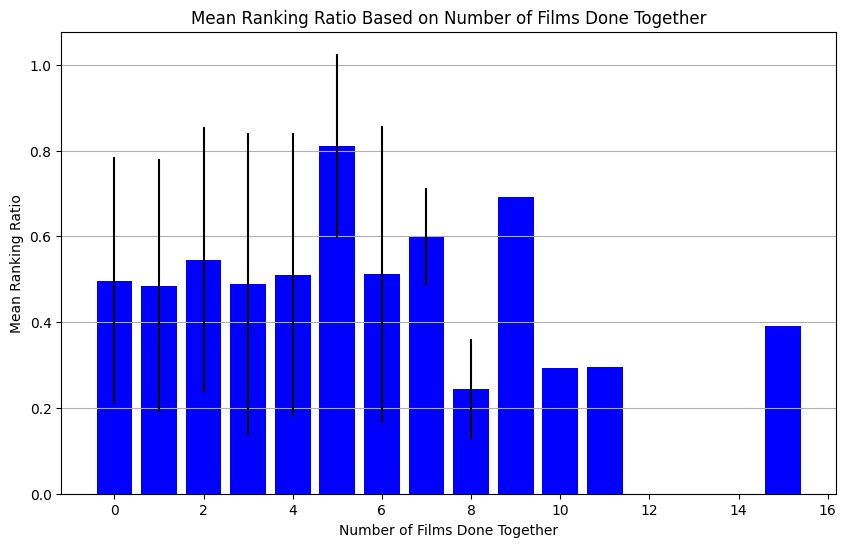

In [63]:
grouped_data = comparison_df.groupby('Number_of_films_together_last')['RankingRatio_last']
mean_ranking_ratio_df = grouped_data.mean().reset_index()
std_dev_ranking_ratio_df = grouped_data.std().reset_index()

# Plotting with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(mean_ranking_ratio_df['Number_of_films_together_last'], mean_ranking_ratio_df['RankingRatio_last'], yerr=std_dev_ranking_ratio_df['RankingRatio_last'], color='blue')
plt.xlabel('Number of Films Done Together')
plt.ylabel('Mean Ranking Ratio')
plt.title('Mean Ranking Ratio Based on Number of Films Done Together')
plt.grid(axis='y')
plt.show()

In [62]:
(
so.Plot(data=df_pairs, y="RankingRatio", x="Number_of_films_together")
.add(so.Dots(alpha = 1/df_pairs.loc[df_pairs["RankingRatio" == df_pairs["RankingRatio"]].count()]))
.add(so.Line(), so.Est(errorbar=('ci', 95)))
.plot()
)

TypeError: unsupported operand type(s) for /: 'int' and 'str'